# Análise exploratória inicial dos dados de Expectativa de Vida

Equipe: Avelar Hostalácio, Carolina Brandão, Daniel Andrade, Enzo Pierazolli, Iago Gabino

Dataset utilizado para análises: [Life Expectancy WHO](https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated)

## Leitura inicial do dataset e correção de colunas

Substituindo a coluna Economy_status_Developed para 'developed' booleana:

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as ss

dataset = pd.read_csv('Life-Expectancy-Data.csv')

dataset.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Contando linhas e colunas:

In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

## Reorganizando os dados do banco de dados

Dropamos algumas colunas que consideramos irrelevantes pro projeto e renomeamos outras, para facilitar a visualização/manipulação posterior dos dados.

In [137]:
dataset.drop(['Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Economy_status_Developing'], axis=1, inplace=True)

In [138]:
##trocas developing e developed por true e false
dataset.rename(columns={'Economy_status_Developed':'developed'}, inplace=True)
dataset["developed"] = dataset["developed"].astype(bool)
dataset['developed'].unique()

array([False,  True])

In [139]:
# renomear colunas com nomes com letra minuscula e no formato nome_da_coluna
dataset.rename(columns={'Country':'country', 'Region':'region', 'Year':'year', 'Infant_deaths':'infant_deaths', 'Under_five_deaths':'under_five_deaths', 'Adult_mortality':'adult_mortality', 'Alcohol_consumption':'alcohol_consumption', 'Hepatitis_B':'hepatitis_b', 'Measles':'measles', 'BMI':'bmi', 'Polio':'polio', 'Diphtheria':'diphtheria', 'Incidents_HIV':'incidents_hiv', 'GDP_per_capita':'gdp_per_capita', 'Population_mln':'population_mln', 'Schooling':'schooling', 'Life_expectancy':'life_expectancy'}, inplace=True)

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              2864 non-null   object 
 1   region               2864 non-null   object 
 2   year                 2864 non-null   int64  
 3   infant_deaths        2864 non-null   float64
 4   under_five_deaths    2864 non-null   float64
 5   adult_mortality      2864 non-null   float64
 6   alcohol_consumption  2864 non-null   float64
 7   hepatitis_b          2864 non-null   int64  
 8   measles              2864 non-null   int64  
 9   bmi                  2864 non-null   float64
 10  polio                2864 non-null   int64  
 11  diphtheria           2864 non-null   int64  
 12  incidents_hiv        2864 non-null   float64
 13  gdp_per_capita       2864 non-null   int64  
 14  population_mln       2864 non-null   float64
 15  schooling            2864 non-null   f

#### Explicações breves sobre as colunas:

- **country:** país (179 países)

- **region:** região em que o país se encontra (África, América Central e Caribe, América do Norte, América do Sul, Ásia, 0ceania, Oriente Médio, União Europeia, e Resto da Europa)

- **year:** ano, de 2000 a 2015 

- **infant_deaths:** número de morte de bebês a cada 1000 habitantes

- **under_five_deaths:** número de morte de crianças menores de 5 anos a cada 1000 habitantes

- **adult_mortality:** número de mortes de adultos a cada 1000 habitantes

- **alcohol_consumption:** consumo de álcool puro (em litros) por pessoa com 15 anos ou mais

- **hepatitis_b:** porcentagem de cobertura de vacinação contra hepatite B em crianças de 1 ano

- **measles:** porcentagem de cobertura da primeira dose de vacinação contra sarampo em crianças de 1 ano

- **bmi:** índice de massa corporal médio de adultos. É definido como o peso de uma pessoa em quilogramas dividido pelo quadrado da altura dessa pessoa em metros (kg / m2)

- **polio:** porcentagem de cobertura de vacinação contra poliomielite em crianças de 1 ano

- **diphteria:** porcentagem de cobertura de vacinação contra difteria em crianças de 1 ano

- **incidents_hiv:** número de incidentes de HIV por 1000 habitantes com idade entre 15 e 49 anos

- **gdp_per_capita:** Produto Interno Bruto per capita (em USD)

- **population_mln:** população total em milhões

- **schooling:** média de anos que pessoas com 25 anos ou mais estudaram 

- **developed:** desenvolvido (true) ou em desenvolvimento (false)

- **life_expectancy:** média de expectativa de vida de ambos os sexos




## Plots para análise inicial de dados

<Axes: xlabel='year', ylabel='life_expectancy'>

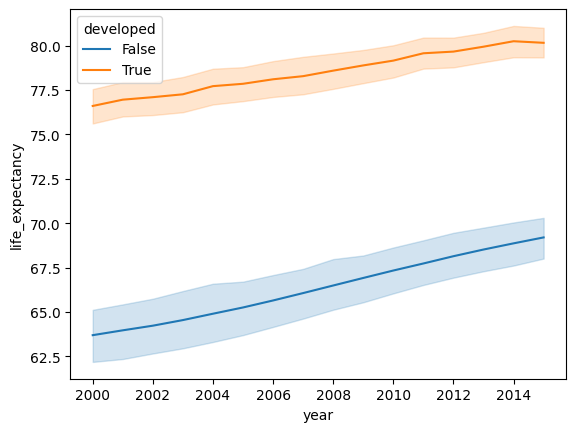

In [141]:
sns.lineplot(x = "year", y = "life_expectancy", hue = "developed", data = dataset)

<Axes: xlabel='year', ylabel='life_expectancy'>

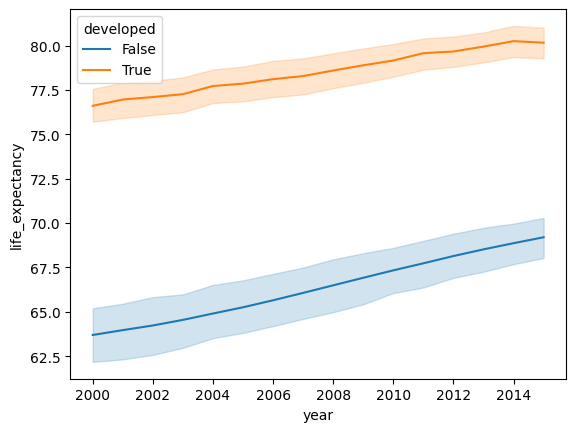

In [142]:
sns.lineplot(x = "year", y = "life_expectancy", hue = "developed", data = dataset)

<Axes: xlabel='year', ylabel='life_expectancy'>

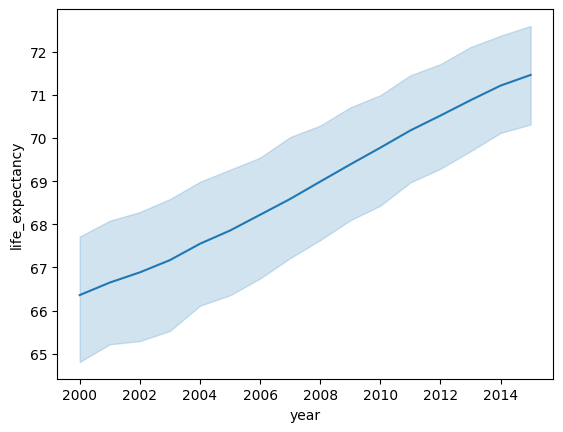

In [143]:
sns.lineplot(x = "year", y = "life_expectancy", data = dataset)

<Axes: xlabel='gdp_per_capita', ylabel='life_expectancy'>

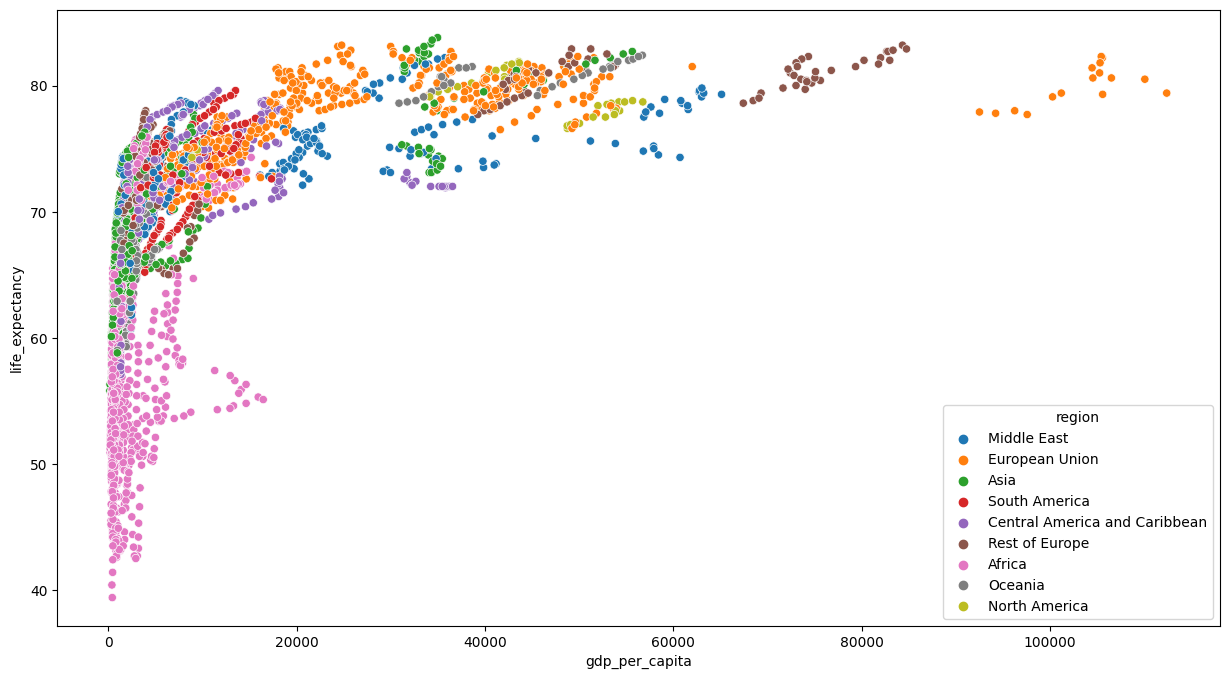

In [144]:
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x="gdp_per_capita", y="life_expectancy",hue="region", data= dataset)

<Axes: xlabel='life_expectancy', ylabel='Count'>

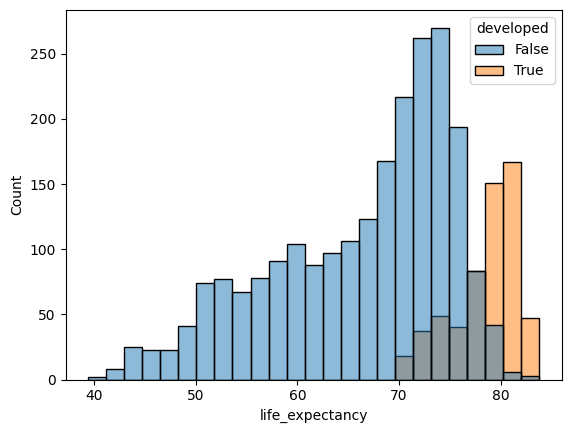

In [145]:
#plot an histogram
sns.histplot(x='life_expectancy', hue='developed', data=dataset)

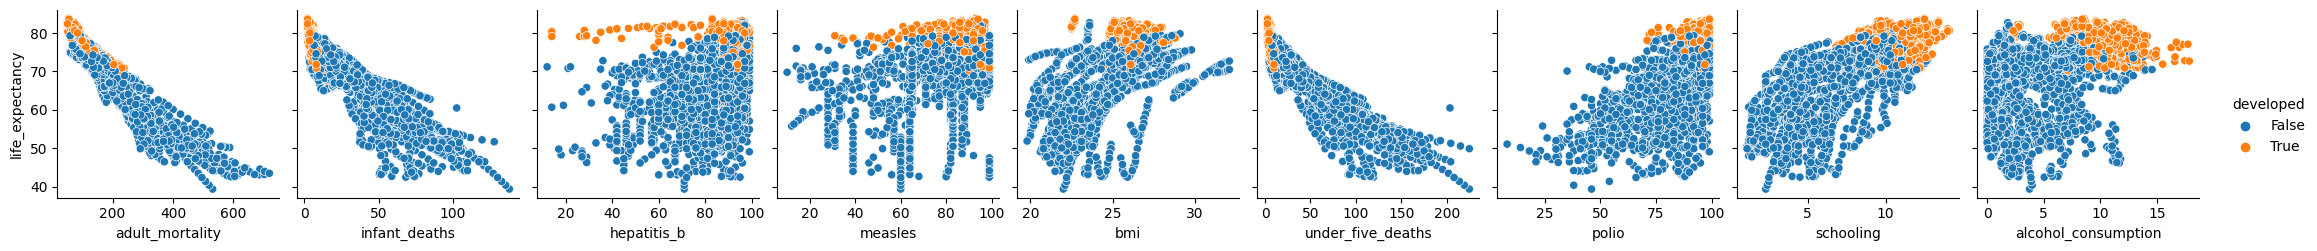

In [146]:
sns.pairplot(dataset, hue='developed', y_vars='life_expectancy', x_vars=['adult_mortality', 'infant_deaths', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'schooling', 'alcohol_consumption'])


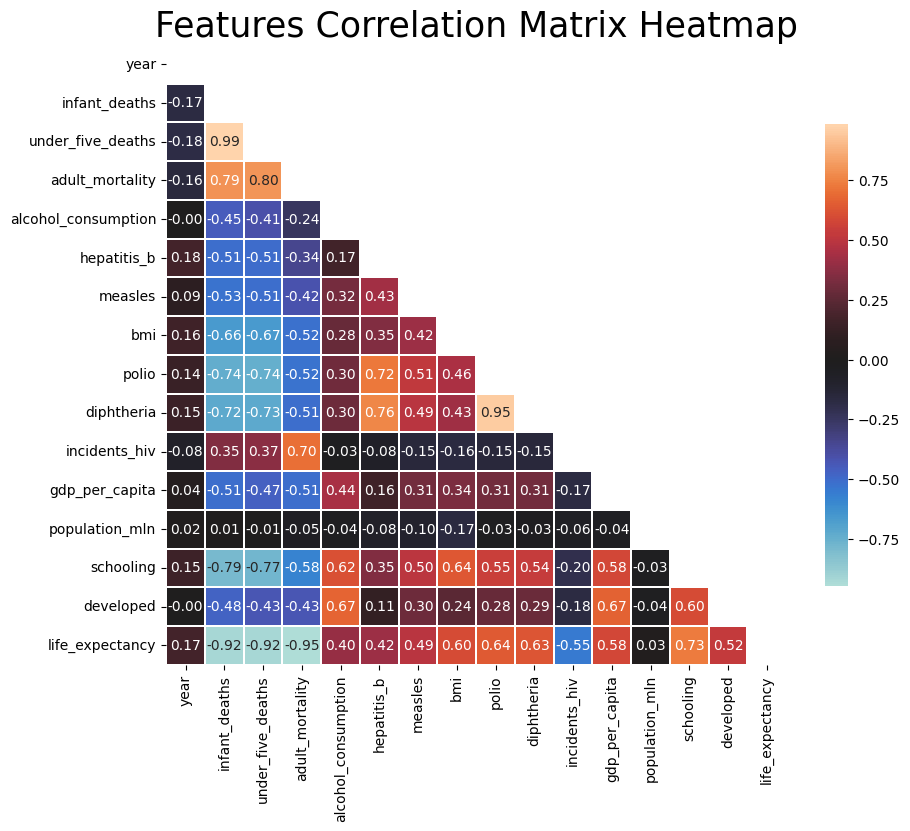

In [147]:
plt.figure(figsize=(10,10))

corr = dataset.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(dataset.corr(numeric_only=True), 
            mask=mask,
            center=0,
            annot=True,
            fmt='.2f',
            square=True,
            linewidths=.2,
            cbar_kws={"shrink": .6})

plt.title('Features Correlation Matrix Heatmap', fontsize=25);

## Consumo de Álcool e a Expectativa de Vida: Europa e África

A partir da EDA, observamos uma moderada correlação entre consumo de álcool e a expectativa de vida. Pensamos que uma maneira interessante de analisar essa correlação seria analisando as duas variáveis na União Europeia e na África, já que são continentes com realidades econômicas e sociais diferentes.

<Axes: xlabel='alcohol_consumption', ylabel='life_expectancy'>

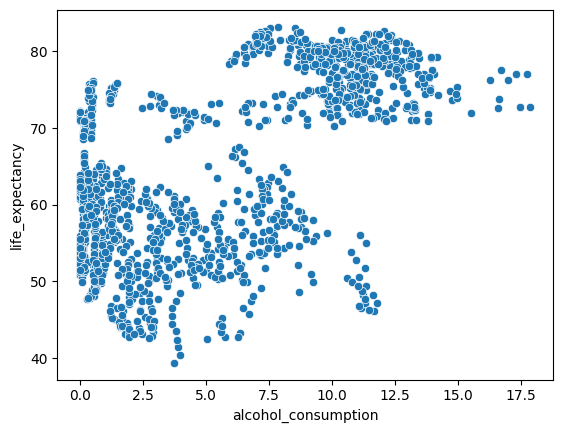

In [148]:
europe_or_africa = dataset[(dataset['region'] == 'European Union') | (dataset['region'] == 'Africa')]

sns.scatterplot(x='alcohol_consumption', y='life_expectancy', data=europe_or_africa)


Calculando a correlação entre as duas variáveis nesses continentes:

In [149]:
from scipy import stats

# calcula a correlação entre as variáveis
pearson_coef, p_value = stats.pearsonr(europe_or_africa['alcohol_consumption'], europe_or_africa['life_expectancy'])
print("Correlação de Pearson: ", pearson_coef, "\nP-valor da correlação: ", p_value)

Correlação de Pearson:  0.5993071156171337 
P-valor da correlação:  1.5032322395532604e-122


Dado que a Correlação de Pearson entre as duas variáveis é aproximadamente 0.6, podemos dizer que há uma correlação positiva considerável. Além disso, um p-valor próximo de 0 indica que a correlação é estatisticamente significativa.

Porém esse resultado não parece condizer com a realidade, dado que o aumento do consumo de álcool não parece ser um fator que aumenta a expectativa de vida. Para entender melhor essa correlação, vamos analisar os dados de cada continente separadamente.

<Axes: xlabel='alcohol_consumption', ylabel='life_expectancy'>

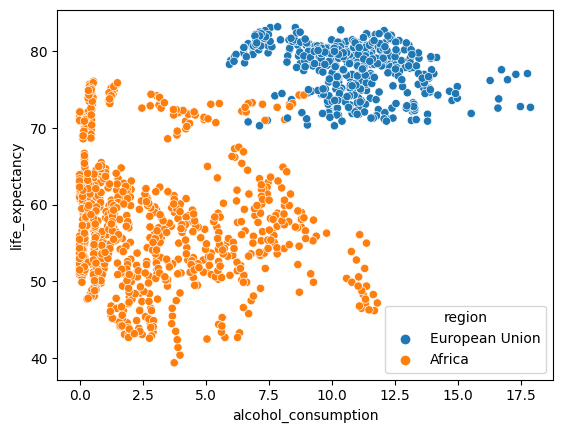

In [150]:
sns.scatterplot(x='alcohol_consumption', y='life_expectancy', data=europe_or_africa, hue='region')

Calculando a correlação entre as duas variáveis na União Europeia e na África:

In [151]:
eu = europe_or_africa[europe_or_africa['region'] == 'European Union']
af = europe_or_africa[europe_or_africa['region'] == 'Africa']

pearson_coef, p_value = stats.pearsonr(eu['alcohol_consumption'], eu['life_expectancy'])
print("Correlação de Pearson para Europa: ", pearson_coef, " | P-valor: ", p_value)

pearson_coef, p_value = stats.pearsonr(af['alcohol_consumption'], af['life_expectancy'])
print("Correlação de Pearson para Africa: ", pearson_coef, " | P-valor: ", p_value)

Correlação de Pearson para Europa:  -0.3176588365484488  | P-valor:  1.3881362131470997e-11
Correlação de Pearson para Africa:  -0.1622912854255703  | P-valor:  3.1654003979640445e-06


As correlações entre as variáveis nos continentes são negativas, e também são mais fracas, indicando que o consumo de álcool não é um fator muito relevante para a expectativa de vida nesses continentes, contrariando a análise conjunta dos continentes. Dessa forma, podemos dizer que a região é um _fator de confusão_ para a correlação entre as variáveis.

# Teste de Hipótese: Diferença entre o crescimento da expectativa de vida de países desenvolvidos e não desenvolvidos

H0: o país ser desenvolvido ou não não afeta a média da diferença entre a expectativa de vida de 2015 e 2000

H1: países não desenvolvidos tiveram um aumento médio maior na expectativa de vida entre 2000 e 2015 em comparação com países desenvolvidos

In [152]:
# conta paises desenvolvidos
developed_countries = dataset[dataset['developed'] == True]
developed_countries['country'].nunique()

37

In [153]:
# diferença entre a expectativa de vida de 2015 e 2000
# novo dataset com os países e as diferenças
life_expectancy_difference = pd.DataFrame(columns=['country', 'difference', 'region', 'developed'])
life_expectancy_difference['country'] = dataset['country'].unique()

# calcula a diferença para cada país
for country in life_expectancy_difference['country']:
    difference = dataset[(dataset['country'] == country) & (dataset['year'] == 2015)]['life_expectancy'].values[0] - dataset[(dataset['country'] == country) & (dataset['year'] == 2000)]['life_expectancy'].values[0]
    life_expectancy_difference.loc[life_expectancy_difference['country'] == country, 'difference'] = difference
    life_expectancy_difference.loc[life_expectancy_difference['country'] == country, 'region'] = dataset[dataset['country'] == country]['region'].values[0]
    life_expectancy_difference.loc[life_expectancy_difference['country'] == country, 'developed'] = dataset[dataset['country'] == country]['developed'].values[0]

life_expectancy_difference

,country,difference,region,developed
0,Turkiye,6.5,Middle East,False
1,Spain,3.8,European Union,True
2,India,6.1,Asia,False
3,Guyana,4.1,South America,False
4,Israel,3.1,Middle East,True
...,...,...,...,...
174,Qatar,2.3,Middle East,False
175,Fiji,1.4,Oceania,False
176,Australia,3.2,Oceania,True
177,North Macedonia,2.5,Rest of Europe,False


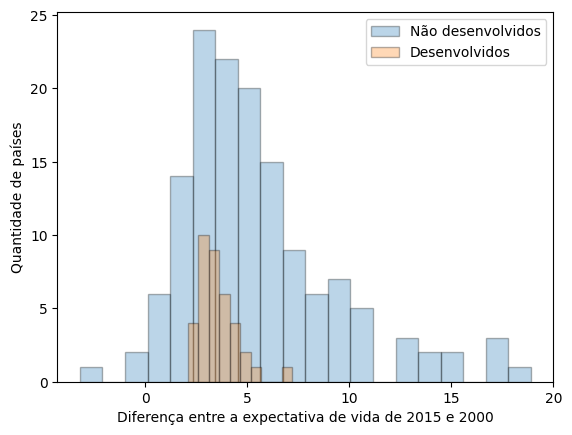

In [154]:
developed = life_expectancy_difference[life_expectancy_difference['developed'] == True]
not_developed = life_expectancy_difference[life_expectancy_difference['developed'] == False]


plt.hist(not_developed['difference'], bins=20, alpha=0.3, label='Não desenvolvidos', edgecolor='k')
plt.hist(developed['difference'], alpha=0.3, label='Desenvolvidos', edgecolor='k')
plt.xlabel('Diferença entre a expectativa de vida de 2015 e 2000')
plt.ylabel('Quantidade de países')
plt.legend()
plt.show()

In [155]:
# diferença de médias entre os países desenvolvidos e não desenvolvidos
developed = life_expectancy_difference[life_expectancy_difference['developed'] == True]
not_developed = life_expectancy_difference[life_expectancy_difference['developed'] == False]

developed_mean = developed['difference'].mean()
not_developed_mean = not_developed['difference'].mean()

print('Média de diferença entre a expectativa de vida de 2015 e 2000 para países desenvolvidos: ', developed_mean)
print('Média de diferença entre a expectativa de vida de 2015 e 2000 para países não desenvolvidos: ', not_developed_mean)

t_obs = not_developed_mean - developed_mean

print('Diferença entre as médias: ', t_obs)

Média de diferença entre a expectativa de vida de 2015 e 2000 para países desenvolvidos:  3.556756756756756
Média de diferença entre a expectativa de vida de 2015 e 2000 para países não desenvolvidos:  5.506338028169014
Diferença entre as médias:  1.9495812714122582


Testaremos se essa diferença foi devido ao acaso ou se é significativa, por meio do teste de permutação.

In [156]:
df_shuffled = life_expectancy_difference.copy()
filtro = df_shuffled['developed'] == False
np.random.shuffle(filtro.values)
diff = df_shuffled[filtro]['difference'].mean() - df_shuffled[~filtro]['difference'].mean()
diff

0.26996574038827426

Repetir o teste 10000 vezes:

In [157]:
N = 10000
diferencas = np.zeros(N)
for i in range(N):
    np.random.shuffle(filtro.values)
    diff = df_shuffled[~filtro]['difference'].mean() - df_shuffled[filtro]['difference'].mean()
    diferencas[i] = diff

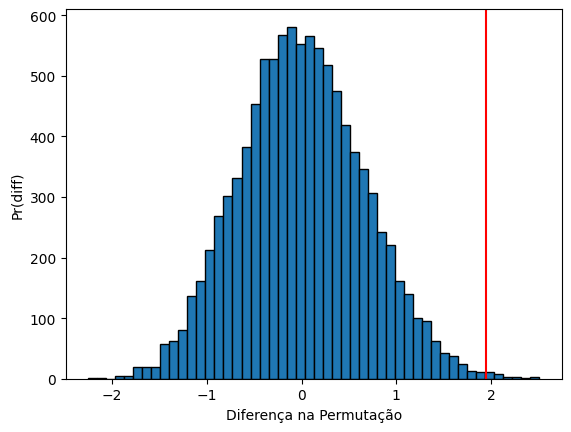

In [158]:
plt.hist(diferencas, bins=50, edgecolor='k')
plt.xlabel('Diferença na Permutação')
plt.ylabel('Pr(diff)')
plt.vlines(t_obs, 0, 0.14, color='red')
plt.axvline(t_obs, color='red')
plt.show()

Cálculo do p-valor:

In [159]:
p_value = np.count_nonzero(diferencas > t_obs) / N
p_value

0.0029

#### CONCLUSÃO
Dado que o p-valor é menor que 0.05, podemos rejeitar a hipótese nula e concluir que a diferença entre a expectativa de vida de 2015 e 2000 foi significativamente maior em países não desenvolvidos.

## Teste de hipótese: Correlação entre Expectativa de vida e Educação


Será que a correlação, previamente calculada na matriz de correlações, de p=0.73 é dada pelo acaso? Ou uma taxa de educação maior realmente impacta positivamente na expectativa de vida da população?

In [160]:
#correlação entre expectativa de vida e educação
corr = dataset['schooling'].corr(dataset['life_expectancy'])
print("Correlação de Pearson: ", corr)

Correlação de Pearson:  0.7324844688915007


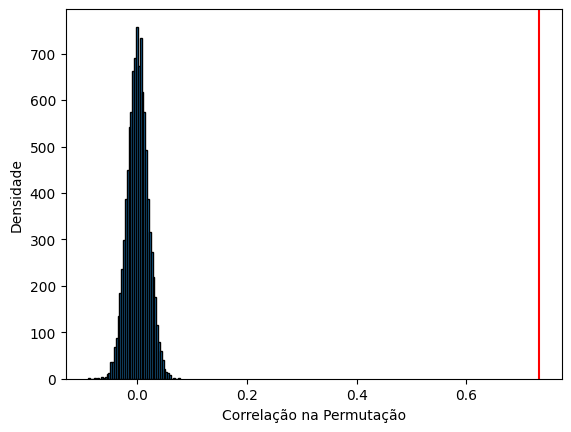

In [161]:
#calcular o p-value da correlação por permutação
N = 10000
dataset_shuffled = dataset.copy()
correlacoes = np.zeros(N)
for i in range(N):
    np.random.shuffle(dataset_shuffled['schooling'].values)
    correlacoes[i] = dataset_shuffled['schooling'].corr(dataset_shuffled['life_expectancy'])

plt.hist(correlacoes, bins=50, edgecolor='k')
plt.xlabel('Correlação na Permutação')
plt.ylabel('Densidade')
plt.axvline(corr, color='red')
plt.show()

É bastante claro, após a realização deste teste de permutação que a correlação entre escolaridade e expectativa de vida é realmente existente e tem p-value igual a zero. 

In [162]:
#p-value
p_value = np.count_nonzero(correlacoes > corr) / N
p_value

0.0

# Análise experimental: Guerras

Primeiramente, procuramos países onde a expectativa de vida de 2015 foi menor que a de 2000.

In [163]:
#países em que a diferença de expectativa de vida é negativa
life_expectancy_difference[life_expectancy_difference['difference'] < 0]

,country,difference,region,developed
43,Grenada,-0.2,Central America and Caribbean,False
100,Syrian Arab Republic,-3.2,Middle East,False


Iremos focar na Síria, pela maior diferença.

## SÍRIA

Analisando a expectativa de vida ao longo dos anos.

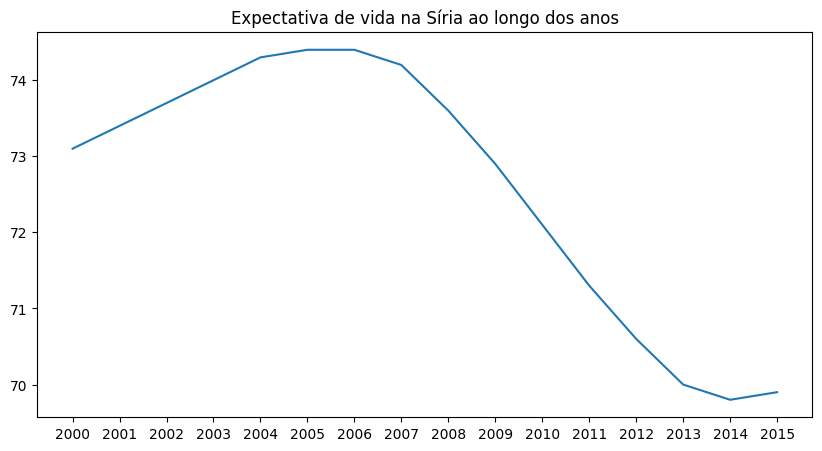

In [164]:
# gráfico de expectativa de vida ao longo dos anos
syria = dataset[dataset['country'] == 'Syrian Arab Republic']
syria = syria.sort_values(by='year')
syria[['year', 'life_expectancy']]
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Expectativa de vida na Síria ao longo dos anos')
plt.plot(syria['year'], syria['life_expectancy'])

In [165]:
# diferença entre a maior e a menor expectativa de vida da síria e anos em que ocorreram
maxYear = syria[syria['life_expectancy'] == syria['life_expectancy'].max()]['year']
minYear = syria[syria['life_expectancy'] == syria['life_expectancy'].min()]['year']
max = syria['life_expectancy'].max()
min = syria['life_expectancy'].min()
print('Ano com maior expectativa de vida: ', maxYear.values[0], ' | Expectativa de vida: ', max)
print('Ano com menor expectativa de vida: ', minYear.values[0], ' | Expectativa de vida: ', min)
print('Diferença: ', max - min)

Ano com maior expectativa de vida:  2005  | Expectativa de vida:  74.4
Ano com menor expectativa de vida:  2014  | Expectativa de vida:  69.8
Diferença:  4.6000000000000085


A Síria é palco de uma guerra civil que começou em 2011 e ainda não acabou. A guerra civil na Síria é um conflito entre o governo sírio e forças da oposição, que começou com protestos pacíficos contra o governo sírio, liderado pelo presidente Bashar al-Assad. O conflito se transformou em uma guerra civil, após o uso da força pelo governo para reprimir os protestos. 

De acordo com o Observatório Sírio para os Direitos Humanos (OSDH), até 2021, a guerra civil causou exatas 494.438 mortes desde 2011. A grande maioria das mortes que a organização conseguiu confirmar aconteceu entre "o fim de 2012 e o fim de 2015". A seguir analisaremos as métricas relacionadas à mortalidade nesse período.

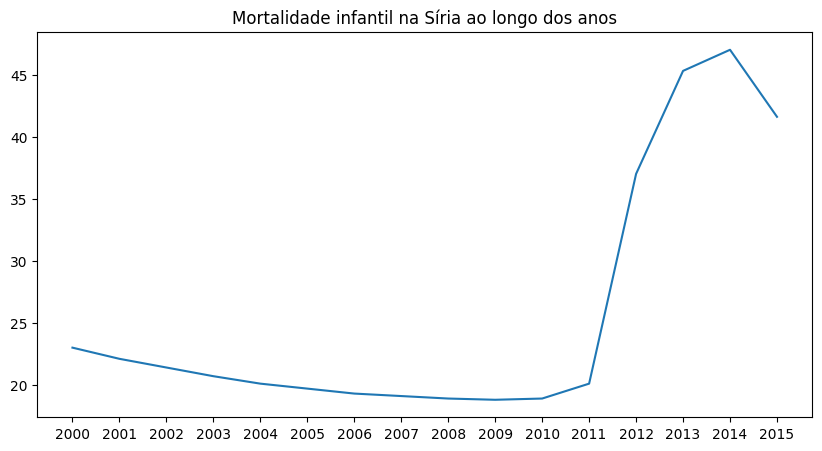

In [166]:
#mortalidade infantil ao longo dos anos

plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Mortalidade infantil na Síria ao longo dos anos')
plt.plot(syria['year'], syria['under_five_deaths'])

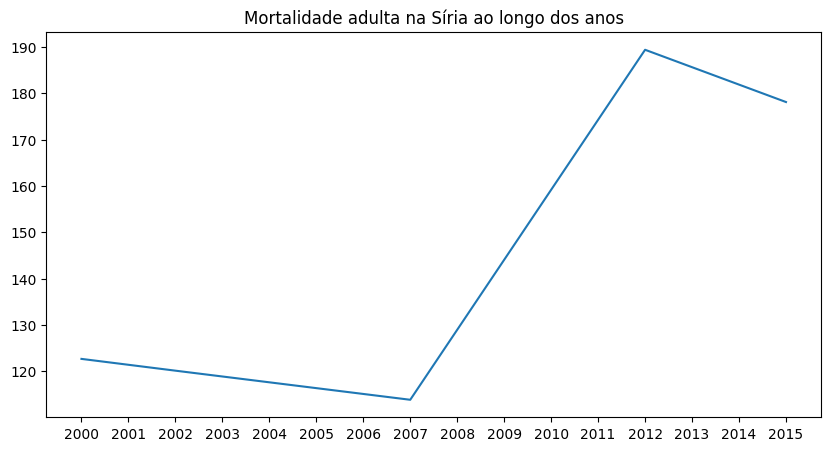

In [167]:
#mortalidade adulta ao longo dos anos
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Mortalidade adulta na Síria ao longo dos anos')
plt.plot(syria['year'], syria['adult_mortality'])

É possível observar que de 2011 à 2014 o número de mortes infantis subiu uma dezena a cada 1000 habitantes, e desde 2007 o de adultos subiu mais de 70, o que condiz com a grande mortalidade apontada pela OSDH. A mortalidade adulta crescendo desde 2007 pode indicar que a guerra civil não foi o único fator que contribuiu para a queda da expectativa de vida na Síria. A queda aproximadamente a partir de 2013 pode indicar uma diminuição da intensidade da guerra, mas não é possível afirmar com certeza.
No entanto, os dados vão contra o afirmado pela OSDH, que diz que a maioria das mortes aconteceu entre 2012 e 2015.

## IRAQUE

A Guerra do Iraque foi um conflito militar que teve início em 2003 e oficialmente terminou em dezembro de 2011. Essa guerra foi iniciada pelos Estados Unidos, liderados pelo presidente George W. Bush, que alegaram a existência de armas de destruição em massa no Iraque como justificativa para a invasão. O conflito resultou em um número significativo de mortes, e embora não haja um consenso definitivo sobre o número exato, estima-se que o conflito tenha causado a morte de centenas de milhares de pessoas, gerando uma grande devastação ao país e desencadeando consequências políticas e sociais que persistem até os dias atuais.

Analisando a expectativa de vida ao longo dos anos.

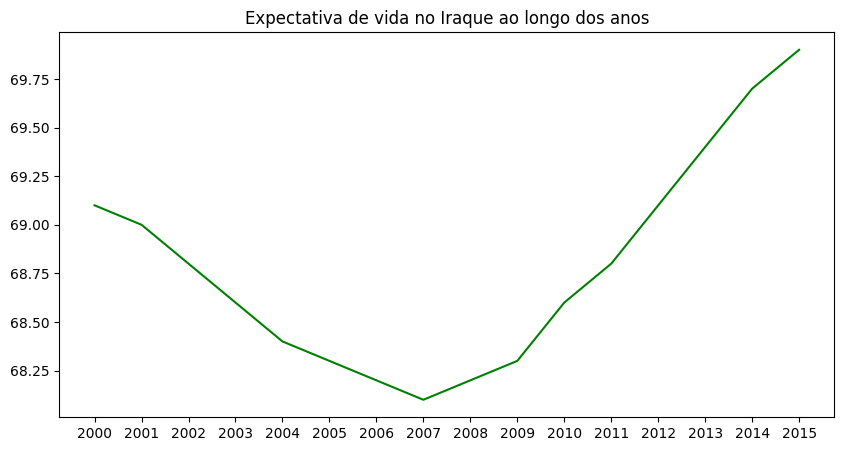

In [168]:
#gráfico de expectativa de vida ao longo dos anos
iraq = dataset[dataset['country'] == 'Iraq']
iraq = iraq.sort_values(by='year')
iraq[['year', 'life_expectancy']]
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Expectativa de vida no Iraque ao longo dos anos')
plt.plot(iraq['year'], iraq['life_expectancy'], color = 'green')

Vemos a partir do gráfico que de 2000 a 2007 houve uma queda na expectativa de vida, mas não muito alta (aproximadamente 1 ano). Com a guerra chegando ao fim, a expectativa de vida voltou a subir, indicando que provavelmente a queda anterior foi devido à guerra.

 A seguir analisaremos as métricas relacionadas à mortalidade nesse período.

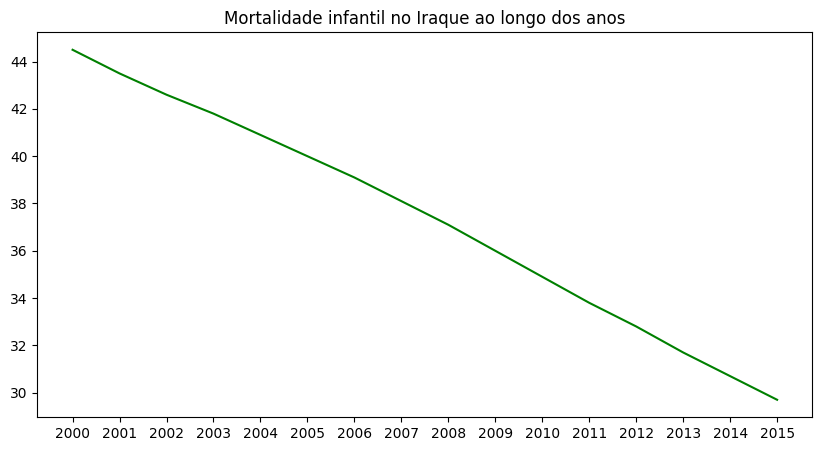

In [169]:
#mortalidade infantil ao longo dos anos
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Mortalidade infantil no Iraque ao longo dos anos')
plt.plot(iraq['year'], iraq['under_five_deaths'], color = 'green')


É observável que não houve um aumento de mortes infantis no período observado, muito provavelmente por não se tratar de uma guerra civil, como foi o caso da Síria.

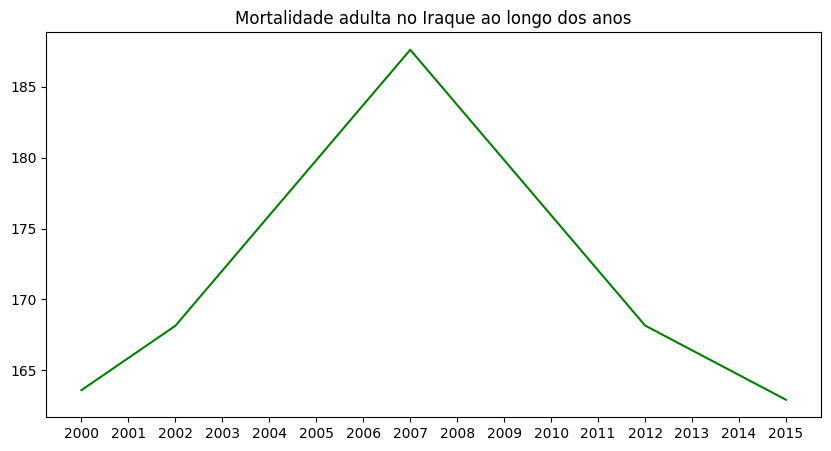

In [170]:
#mortalidade adulta ao longo dos anos
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Mortalidade adulta no Iraque ao longo dos anos')
plt.plot(iraq['year'], iraq['adult_mortality'], color = 'green')


14 de Agosto de 2007 ocorreu o ataque mais mortífero desde o início da guerra. Mais de 500 civis foram mortos numa série de ataques bombistas suicidas coordenados no norte do Iraque em Qahtaniya. Mais de 100 casas e lojas foram destruídas nas explosões.

O formato desse gráfico, juntamente com o texto acima, nos faz deduzir que 2007 foi o ano mais intenso da guerra.
A diferença, no entanto, foi de aproximadamente 30 pessoas (a cada 1000), o que pode parecer não tão grande, mas devemos levar em conta que o número mínimo que temos de mortes já é bem alto. 
Além disso, é possível observar que, a partir de 2003, a inclinação da reta aumentou, alinhando com o início da guerra.

### COMPARANDO
Analiseremos como a guerra afetou diferentes aspectos nos dois países e as diferenças entre eles.

ESCOLARIDADE

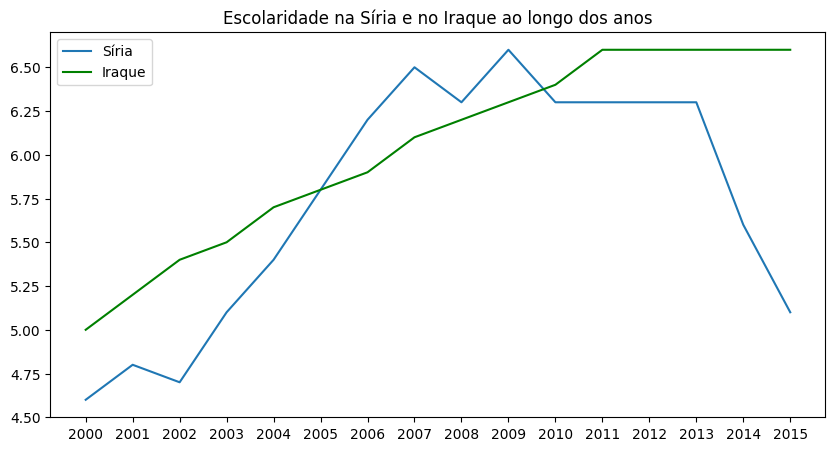

In [171]:
# grafico de schooling ao longo dos anos para a síria e o iraque
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Escolaridade na Síria e no Iraque ao longo dos anos')
plt.plot(syria['year'], syria['schooling'])
plt.plot(iraq['year'], iraq['schooling'], color = 'green')
plt.legend(['Síria', 'Iraque'])

Comparando a taxa de escolaridade entre os dois países, vemos que a Síria, até 2010, tinha uma taxa de crescimento maior que a do Iraque, mas a partir de 2010, a taxa de crescimento da Síria caiu drasticamente, enquanto a do Iraque continuou a crescer. Isso pode ser explicado pelo fato de que a guerra civil na Síria começou em 2011, enquanto a Guerra do Iraque terminou em 2011. Além disso, a guerra civil na Síria pode ter afetado a educação no país, enquanto a Guerra do Iraque não afetou a educação no Iraque, muito provavelmente por não se tratar de uma guerra civil.

ECONOMIA

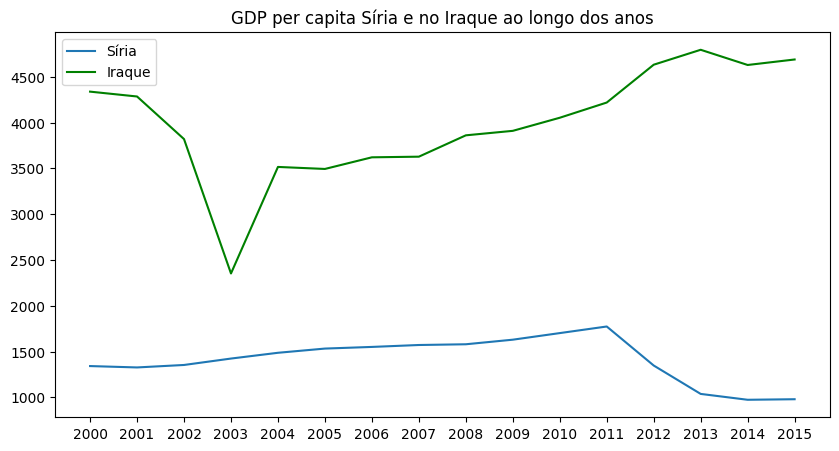

In [172]:
#grafico com GPD per capita ao longo dos anos iraque e siria e media  mundial  
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('GDP per capita Síria e no Iraque ao longo dos anos')
plt.plot(syria['year'], syria['gdp_per_capita'])
plt.plot(iraq['year'], iraq['gdp_per_capita'], color = 'green')
plt.legend(['Síria', 'Iraque'])


IRAQUE: É possível observar uma enorme queda no PIB per capita em 2003, ano da invasão estadunidense que gerou o início da guerra, de mais de 1000 dólares. Em 2004 o PIB já havia se recuperado consideravelmente, mas só voltou ao patamar de 2002 em 2008. A partir de 2011, ano em que a Guerra do Iraque terminou, o PIB per capita começou a subir mais rapidamente. Por fim é possível observar que a diferença de 2000 à 2011 (ano de início e fim da guerra), não parece ser muito expressiva, mas representa a falta de crescimento na economia por 11 anos.

SÍRIA: É possível observar uma queda no PIB per capita em 2011, ano de início da guerra. A partir de 2013, houve uma estagnação, alinhada com o ano em que a mortalidade infantil e adulta começaram a cair. Isso pode indicar que de 2011 a 2013 a guerra estava em seu auge, e a partir de 2013 os impactos da guerra começaram a diminuir. Diferentemente do Iraque, não houve um crecimento no PIB per capita após a queda, indicando que a guerra afetou mais intensamente a economia da Síria.

Analisando numericamente o PIB do Iraque, complementando a análise acima.

In [173]:
# diferenca de GDP per capita do iraque de 2002 e 2003
iraq[iraq['year'] == 2003]['gdp_per_capita'].values[0] - iraq[iraq['year'] == 2002]['gdp_per_capita'].values[0]
print('Diferença de GDP per capita do Iraque de 2002 a 2003: ', iraq[iraq['year'] == 2003]['gdp_per_capita'].values[0] - iraq[iraq['year'] == 2002]['gdp_per_capita'].values[0])


# diferenca de GDP per capita do iraque de 2003 e 2004
iraq[iraq['year'] == 2004]['gdp_per_capita'].values[0] - iraq[iraq['year'] == 2003]['gdp_per_capita'].values[0]
print('Diferença de GDP per capita do Iraque de 2003 a 2004: ', iraq[iraq['year'] == 2004]['gdp_per_capita'].values[0] - iraq[iraq['year'] == 2003]['gdp_per_capita'].values[0])

# diferenca de GDP per capita do iraque de 2002 e 2004
iraq[iraq['year'] == 2004]['gdp_per_capita'].values[0] - iraq[iraq['year'] == 2002]['gdp_per_capita'].values[0]
print('Diferença de GDP per capita do Iraque de 2002 a 2004: ', iraq[iraq['year'] == 2004]['gdp_per_capita'].values[0] - iraq[iraq['year'] == 2002]['gdp_per_capita'].values[0])

#diferenca de GDP per capita do iraque de 2002 e 2008
iraq[iraq['year'] == 2008]['gdp_per_capita'].values[0] - iraq[iraq['year'] == 2002]['gdp_per_capita'].values[0]
print('Diferença de GDP per capita do Iraque de 2002 a 2008: ', iraq[iraq['year'] == 2008]['gdp_per_capita'].values[0] - iraq[iraq['year'] == 2002]['gdp_per_capita'].values[0])

# diferenca de GDP per capita do iraque de 2000 e 2011
iraq[iraq['year'] == 2011]['gdp_per_capita'].values[0] - iraq[iraq['year'] == 2000]['gdp_per_capita'].values[0]
print('Diferença de GDP per capita do Iraque de 2000 a 2011: ', iraq[iraq['year'] == 2011]['gdp_per_capita'].values[0] - iraq[iraq['year'] == 2000]['gdp_per_capita'].values[0])


Diferença de GDP per capita do Iraque de 2002 a 2003:  -1467
Diferença de GDP per capita do Iraque de 2003 a 2004:  1163
Diferença de GDP per capita do Iraque de 2002 a 2004:  -304
Diferença de GDP per capita do Iraque de 2002 a 2008:  41
Diferença de GDP per capita do Iraque de 2000 a 2011:  -119


Até então, com os dados observados, tudo parece indicar que a guerra da Síria foi mais devastadora que a do Iraque, em vários aspectos. 

POPULAÇÃO

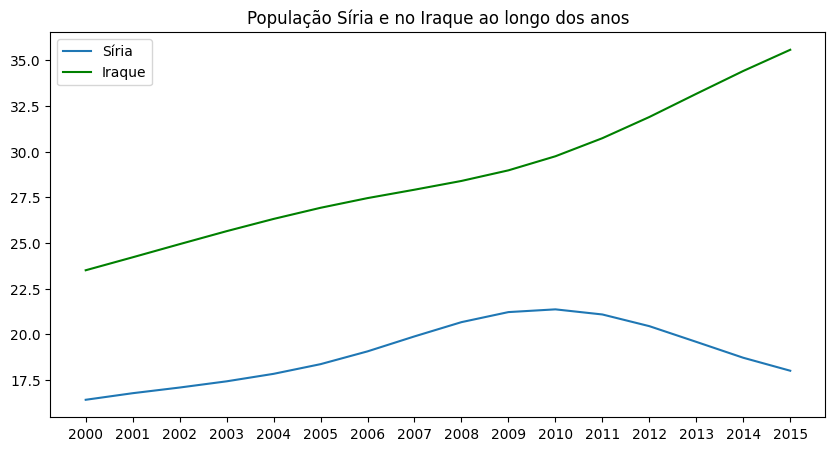

In [174]:
#grafico de populacao ao longo dos anos para a síria e o iraque
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('População Síria e no Iraque ao longo dos anos')
plt.plot(syria['year'], syria['population_mln'])
plt.plot(iraq['year'], iraq['population_mln'], color = 'green')
plt.legend(['Síria', 'Iraque'])

Mais uma vez, a Síria parece ter sido mais afetada pela guerra que o Iraque, com a população diminuindo a partir de 2010, se alinhando com o início da guerra civil. No Iraque, a população continuou a crescer, mesmo durante a guerra. A inclinação da reta do Iraque, a partir de 2010, se tornou mais acentuada, indicando que a população cresceu mais rápido a partir de 2010. Um dos fatores que pode ter contribuído para isso é o fato de que a guerra acabou em 2011. Agora compararemos esse crescimento com a média mundial.

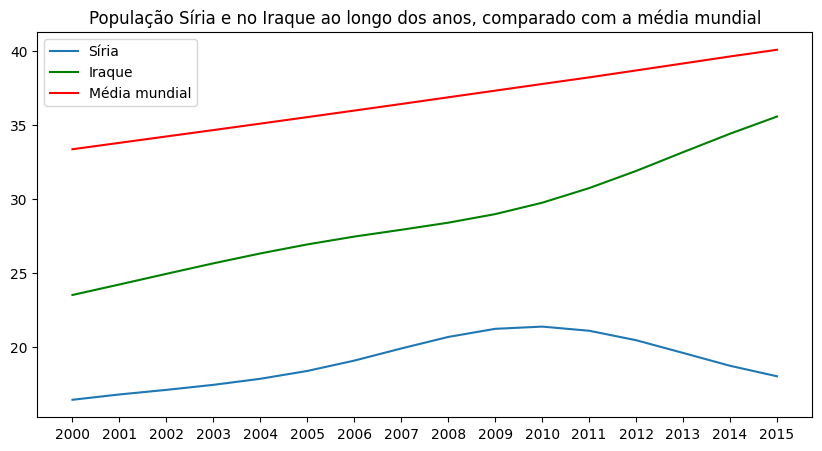

In [175]:
media_populacao = dataset.groupby('year')['population_mln'].mean()

plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('População Síria e no Iraque ao longo dos anos, comparado com a média mundial')
plt.plot(syria['year'], syria['population_mln'])
plt.plot(iraq['year'], iraq['population_mln'], color = 'green')
plt.plot(media_populacao, color = 'red')
plt.legend(['Síria', 'Iraque', 'Média mundial'])

A partir desse gráfico, é possível concluir que a população do Iraque teve um crescimento bem expressivo desde 2010, comparando com a média mundial.

Após todas as análises, podemos concluir as guerras afetaram os dois países de maneiras diferentes, que o Iraque se recompos bem após a guerra, e que, comparado com a Síria, a guerra afetou menos o país, mas ainda assim houveram repercussões, principalmente no que tange a economia. 

Um importante fator que não pode ser deixado de lado é o fato de que, durante uma guerra, a coleta de dados é muito mais difícil, e muitas vezes não é possível coletar dados de forma precisa, o que pode ter afetado os resultados obtidos. Então os resultados correspodem ao que foi possível coletar, mas não necessariamente refletem a realidade.


### ÁFRICA

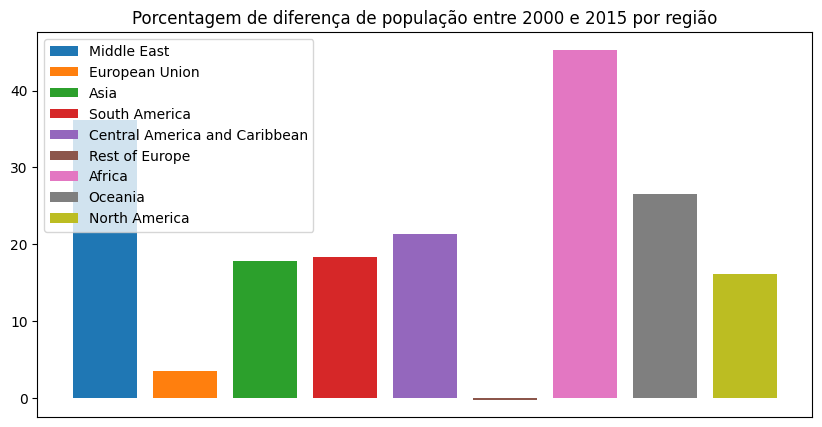

In [176]:

# grafico com porcentagem de diferenca de populacao entre 2000 e 2015 por regiao
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Porcentagem de diferença de população entre 2000 e 2015 por região')
region_unique = dataset['region'].unique()
for region in region_unique:
    region_pop = dataset[dataset['region'] == region]
    region_pop = region_pop.groupby('year')['population_mln'].sum()
    region_pop = (region_pop[2015] - region_pop[2000]) / region_pop[2000] * 100
    plt.bar(region, region_pop)
plt.legend(region_unique)


A partir do gráfico acima, observamos que entre todas as regiões, a África possui o maior aumento populacional quando comparadas as populações de 2000 e 2015. A seguir vamos investigar possíveis causas para esse aumento tão expressivo.

#### HIV

O HIV/AIDS é um importante problema de saúde pública e causa milhões de mortes em muitas partes da África. A África subsaariana sozinha respondeu por cerca de 69% de todas as pessoas que viviam com o HIV e 70% de todas as mortes causadas pela doença em 2011.

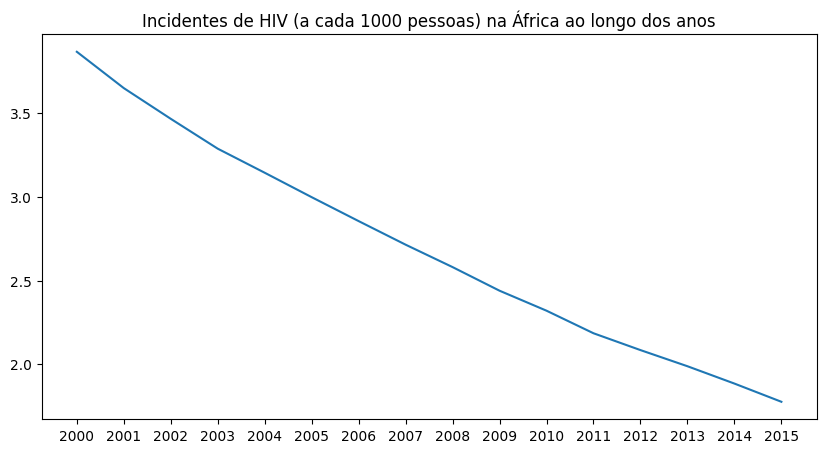

In [177]:
#hiv africa ao longo dos anos
africa = dataset[dataset['region'] == 'Africa']
africa = africa.groupby('year')['incidents_hiv'].mean()
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Incidentes de HIV (a cada 1000 pessoas) na África ao longo dos anos')
plt.plot(africa)

In [178]:
#diferença entre casos de HIV 2000 e 2015
africa = dataset[dataset['region'] == 'Africa']
africa = africa.groupby('year')['incidents_hiv'].mean()
#casos de hiv 2000 e 2015
print('Incidentes de HIV na Africa em 2000: ', africa[2000])
print('Incidentes de HIV na Africa em 2015: ', africa[2015])

print('Diferença entre incidentes de HIV 2000 e 2015: ', africa[2000] - africa[2015])


Incidentes de HIV na Africa em 2000:  3.8643137254901965
Incidentes de HIV na Africa em 2015:  1.7770588235294116
Diferença entre incidentes de HIV 2000 e 2015:  2.087254901960785


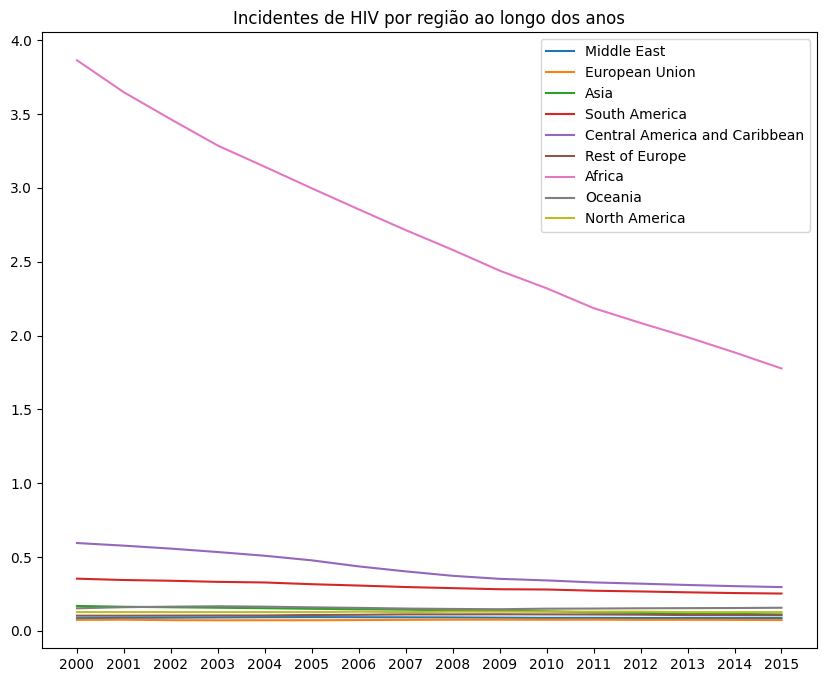

In [179]:
# hiv por regiao ao longo dos anos
plt.figure(figsize=(10, 8))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Incidentes de HIV por região ao longo dos anos')

region_unique = dataset['region'].unique()
for region in region_unique:
    region_hiv = dataset[dataset['region'] == region]
    region_hiv = region_hiv.groupby('year')['incidents_hiv'].mean()
    plt.plot(region_hiv)

plt.legend(region_unique, loc='upper right')


A partir das análises acima, varias conclusões podem ser tomadas
- A África é a região com maior proporção de pessoas infectadas pelo HIV, com uma diferença de mais de 3 pessoas a cada 1000 em relação à segunda região com maior proporção de infectados em 2000.
- A diferença de infectados entre 2000 e 2015 na África é bem significativa, com uma queda de mais de 2 pessoas a cada 1000.
- Em 2015, a África ainda é a região com maior proporção de infectados, mas a diferença entre ela e a segunda região com maior número de infectados é bem menor que em 2000

Tudo isso indica que a diminuição de incidência HIV foi bem expressiva, e pode ter contribuído para o aumento populacional na região.

#### DOENÇAS

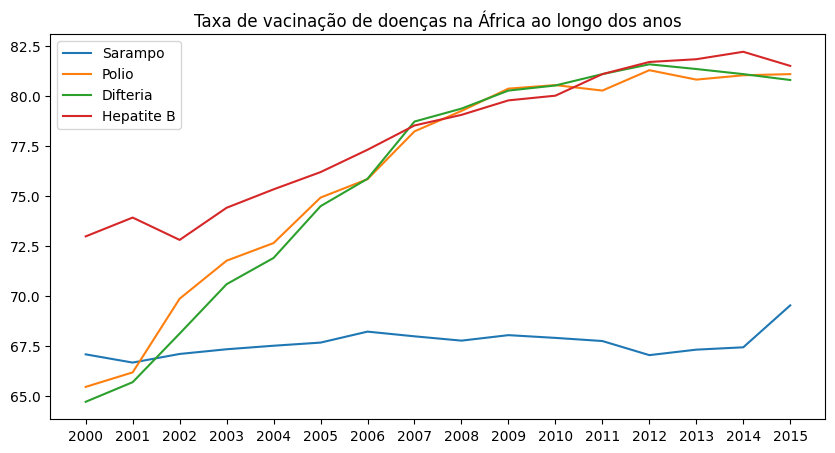

In [180]:
#taxa de cobertura de vacinação em bebes de 1 ano de doenças na africa ao longo dos anos
africa = dataset[dataset['region'] == 'Africa']
measles = africa.groupby('year')['measles'].mean()
polio = africa.groupby('year')['polio'].mean()
diphtheria = africa.groupby('year')['diphtheria'].mean()
hepatite_b = africa.groupby('year')['hepatitis_b'].mean()
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Taxa de vacinação de doenças na África ao longo dos anos')
plt.plot(measles)
plt.plot(polio)
plt.plot(diphtheria)
plt.plot(hepatite_b)
plt.legend(['Sarampo', 'Polio', 'Difteria', 'Hepatite B'])

A taxa de vacinação de crianças é um importante indicador de saúde pública. É visível que a vacinação contra Polio, Difteria e Hepatite B aumentou consideralvemente na região, o que pode ter contribuído para a diminuição da mortalidade infantil, e consequentemente, para o aumento populacional.
Já a taxa da Sarampo não teve uma variação tão grande, e é expressivamente menor que as outras, o que pode indicar que a doença não é tão prevalente na região, ou que a vacinação não é tão disseminada.

Durante os anos de 2003 e 2004 ocorreu uma pequena queda de crescimento da taxa de imuninazação de Pólio, que pode ser explicada pois, na região norte, de maioria muçulmana, a pressão dos círculos salafistas interrompeu as campanhas de vacinação contra a poliomelite. Um boato afirmava que eram uma ferramenta de um grande complô internacional para esterilizar os muçulmanos. 

Agora, comparando com as taxas do resto do mundo

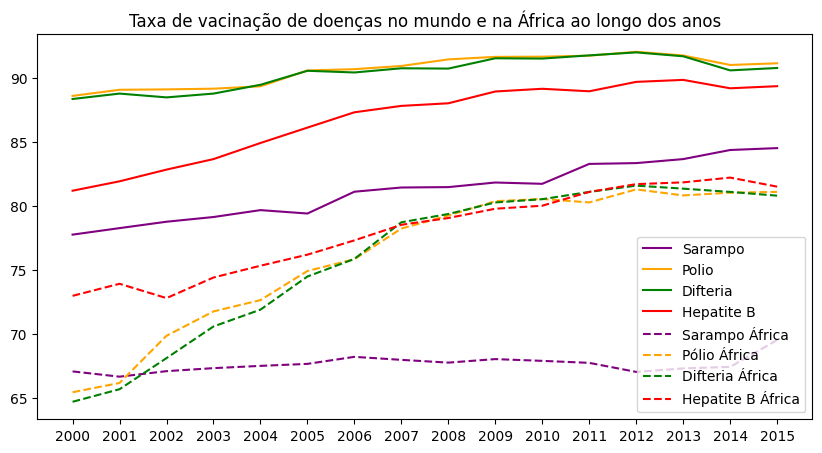

In [181]:

resto_do_mundo = dataset[dataset['region'] != 'Africa']
measles = resto_do_mundo.groupby('year')['measles'].mean()
polio = resto_do_mundo.groupby('year')['polio'].mean()
diphtheria = resto_do_mundo.groupby('year')['diphtheria'].mean()
hepatite_b = resto_do_mundo.groupby('year')['hepatitis_b'].mean()
africa = dataset[dataset['region'] == 'Africa']
africa_measles = africa.groupby('year')['measles'].mean()
africa_polio = africa.groupby('year')['polio'].mean()
africa_diphtheria = africa.groupby('year')['diphtheria'].mean()
africa_hepatite_b = africa.groupby('year')['hepatitis_b'].mean()
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Taxa de vacinação de doenças no mundo e na África ao longo dos anos')
plt.plot(measles, color = 'purple')
plt.plot(polio, color = 'orange')
plt.plot(diphtheria, color = 'green')
plt.plot(hepatite_b, color = 'red')
plt.plot(africa_measles, linestyle='dashed', color = 'purple')
plt.plot(africa_polio, linestyle='dashed', color = 'orange')
plt.plot(africa_diphtheria, linestyle='dashed', color = 'green')
plt.plot(africa_hepatite_b, linestyle='dashed', color = 'red')
plt.legend(['Sarampo', 'Polio', 'Difteria','Hepatite B','Sarampo África', 'Pólio África', 'Difteria África', 'Hepatite B África'])

- É possivel observar que a taxa de vacinação na África, mesmo apresentando um grande crescimento, ainda é bem menor que a média mundial, o que pode ser explicado pelo fato de que a África é um continente mais pobre, que a vacinação é um processo caro e que o acesso a muitas regiões é dificultado por guerras, conflitos e outros fatores.

- Também vemos que a imunização contra sarampo, em todo o mundo, incluindo a África, é bem menor que a imunização contra polio e difteria e hepatite B.

- Por fim, vemos que, na Africa, até 2007, a vacinação contra Hepatite B era maior que a vacinação contra as outras doenças, e que depois disso as taxas de vacinação contra polio e difteria tenderam a se igualar com a de hepatite B. No entanto, no mundo, de 2000 a 2015, a vacinação contra polio e difteria sempre foi maior que a vacinação contra hepatite B.

#### MORTALIDADE 
##### BEBÊS E CRIANÇAS

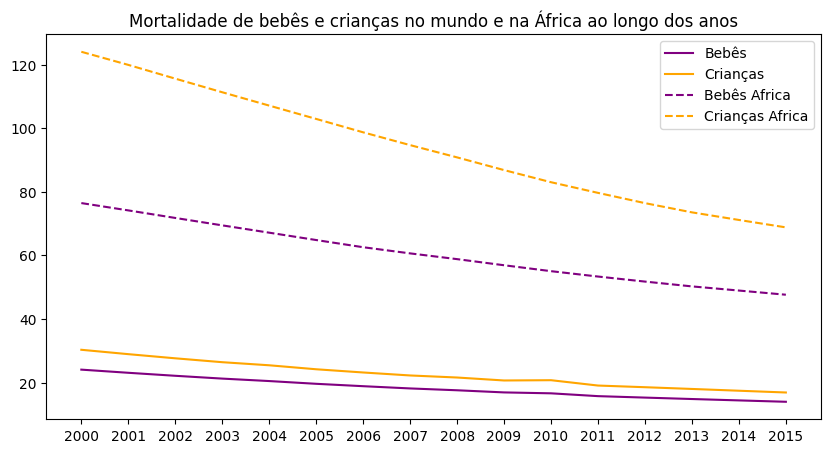

In [182]:
# mortalidade de bebês, crianças e adultos na africa e no mundo ao longo dos anos
resto_do_mundo = dataset[dataset['region'] != 'Africa']
resto_do_mundo_bebes = resto_do_mundo.groupby('year')['infant_deaths'].mean()
resto_do_mundo_criancas = resto_do_mundo.groupby('year')['under_five_deaths'].mean()
africa = dataset[dataset['region'] == 'Africa']
africa_bebes = africa.groupby('year')['infant_deaths'].mean()
africa_criancas = africa.groupby('year')['under_five_deaths'].mean()
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Mortalidade de bebês e crianças no mundo e na África ao longo dos anos')
plt.plot(resto_do_mundo_bebes, color = 'purple')
plt.plot(resto_do_mundo_criancas, color = 'orange')
plt.plot(africa_bebes, linestyle='dashed', color = 'purple')
plt.plot(africa_criancas, linestyle='dashed', color = 'orange')
plt.legend(['Bebês', 'Crianças', 'Bebês Africa', 'Crianças Africa'])

A partir do gráfico acima, é possível observar que a mortalidade infantil na África é extremamente maior que a média mundial, mas também que ela vem diminuindo ao longo dos anos, e um dos fatores que pode ter contribuído para isso é a vacinação, como visto anteriormente.


##### ADULTOS

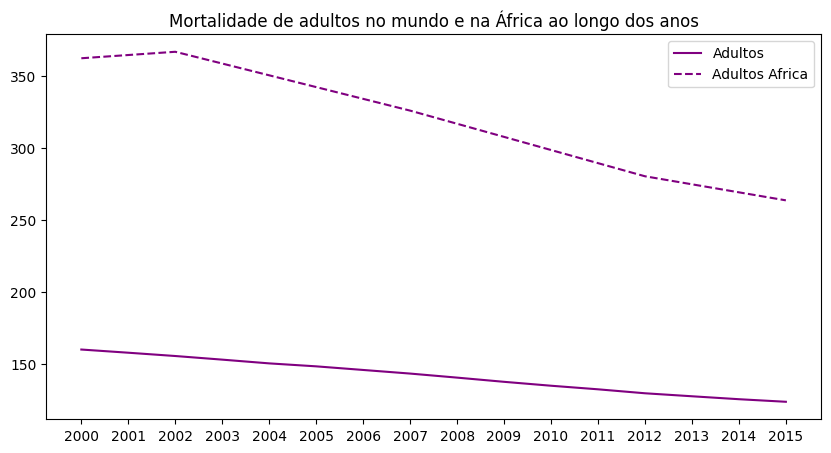

In [183]:
#mortalidade adulta africa e resto do mundo
resto_do_mundo = dataset[dataset['region'] != 'Africa']
resto_do_mundo_adultos = resto_do_mundo.groupby('year')['adult_mortality'].mean()
africa = dataset[dataset['region'] == 'Africa']
africa_adultos = africa.groupby('year')['adult_mortality'].mean()
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Mortalidade de adultos no mundo e na África ao longo dos anos')
plt.plot(resto_do_mundo_adultos, color = 'purple')
plt.plot(africa_adultos, linestyle='dashed', color = 'purple')
plt.legend(['Adultos', 'Adultos Africa'])

Assim como a mortalidade infantil, a mortalidade de adultos na África é bem maior que a média mundial, com uma diferença de aproximadamente 200 adultos durante todos os anos, mas também vem diminuindo ao longo dos anos.


In [184]:
#maior mortalidade de adultos na africa 
print('Maior mortalidade de adultos na África: ', africa_adultos.max())
#media de mortalidade de adultos na africa
print('Média de mortalidade de adultos na África: ', africa_adultos.mean())



Maior mortalidade de adultos na África:  366.74732352941174
Média de mortalidade de adultos na África:  319.0734344362745


Comparando com a mortalidade infantil durante guerras


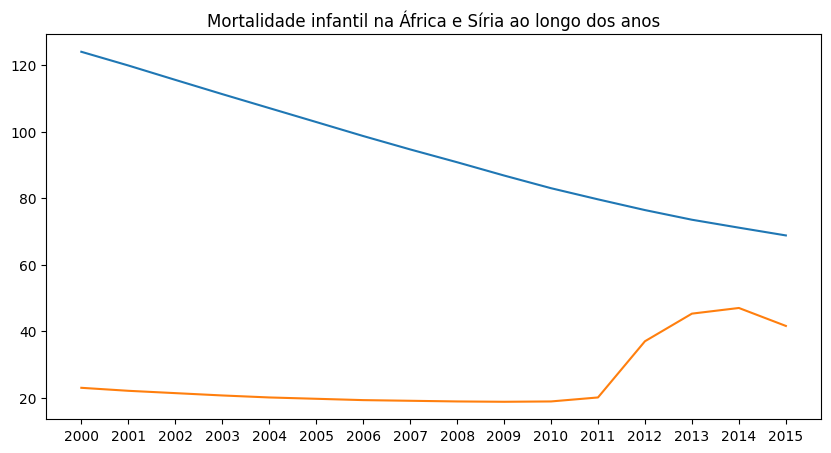

In [185]:
#africa e siria de mortes infantis por ano
africa = dataset[dataset['region'] == 'Africa']
africa = africa.groupby('year')['under_five_deaths'].mean()
syria = dataset[dataset['country'] == 'Syrian Arab Republic']
syria = syria.groupby('year')['under_five_deaths'].mean()
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Mortalidade infantil na África e Síria ao longo dos anos')
plt.plot(africa)
plt.plot(syria)


É bem interessante por em persepectiva com a mortalidade infantil da síria, que durante a guerra civil aumentou exorbitantemente, pois, mesmo com esse aumento, e com a mortalidade infantil na África tendo diminuido muito, a mortalidade infantil na África ainda é maior que a da Síria, o que mostra que a situação no continente é bem precária e que ainda há muito a ser feito, já que um país em guerra, com bombardeios, destruição e falta de recursos, ainda tem taxas menos piores que a África.

# Regressão Linear Simples

Nosso objetivo é prever a média da expectativa de vida ao redor do mundo em 2015, com base nos dados de 2000 a 2014. Para isso, vamos utilizar um modelo de regressão linear considerando expectativa de vida por ano.

O primeiro plot nos mostra a expectativa de vida ao longo dos anos por região, e as retas de regressão linear para cada região, que parecem se adaptar bem aos dados.

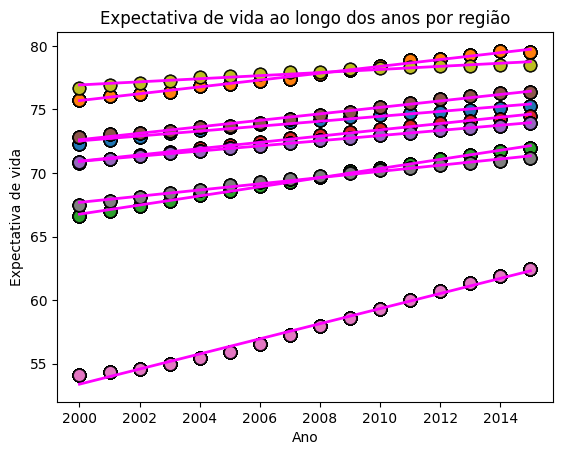

In [186]:
regions = dataset['region'].unique()

for region in regions:
    region_data = dataset[dataset['region'] == region]
    for year in range(2000, 2016):
        region_data.loc[region_data['year'] == year, 'life_expectancy'] = region_data[region_data['year'] == year]['life_expectancy'].mean()
    # um grafico do lado do
    sns.regplot(x='year', y='life_expectancy', data=region_data, n_boot=10000,
                line_kws={'color':'magenta', 'lw':2},
                scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
    # colocar regiao como legenda
    plt.title('Expectativa de vida ao longo dos anos por região')
    plt.xlabel('Ano')
    plt.ylabel('Expectativa de vida')

    

    
plt.show()


Calcularemos agora os parâmetros da regressão linear:

In [187]:
# copia o dataset
df = dataset.copy()

for year in range(2000, 2016):
    df.loc[df['year'] == year, 'life_expectancy'] = df[df['year'] == year]['life_expectancy'].mean() # media da expectativa de vida global por ano

# calcula a regressao linear simples
slope, intercept, r_value, p_value, std_err = stats.linregress(df['year'], df['life_expectancy'])

# printa os resultados e plota o grafico
print('R²: ', r_value**2)
print('Beta: ', slope)
print('Intercepto: ', intercept)
#print('P-value: ', p_value) p_value do que??
#print('Std error: ', std_err)
print('')

# comparar valor previsto da expectativa de vida em 2015 com o valor real
print('Valor previsto da expectativa de vida em 2015: ', intercept + slope*2015)
print('Valor real da expectativa de vida em 2015: ', df[df['year'] == 2015]['life_expectancy'].mean())

# diferenca entre o valor previsto e o valor real
print('Diferença entre o valor previsto e o valor real: ', intercept + slope*2015 - df[df['year'] == 2015]['life_expectancy'].mean())



R²:  0.9975531763387935
Beta:  0.3556933946763061
Intercepto:  -645.1984143936902

Valor previsto da expectativa de vida em 2015:  71.52377587906665
Valor real da expectativa de vida em 2015:  71.46368715083801
Diferença entre o valor previsto e o valor real:  0.06008872822863509


O valor previsto se aproxima muito da expectativa de vida real, e, considerando um R² de 0.99, podemos concluir que o modelo se ajustou muito bem aos dados, como pode ser visto pelo plot abaixo:

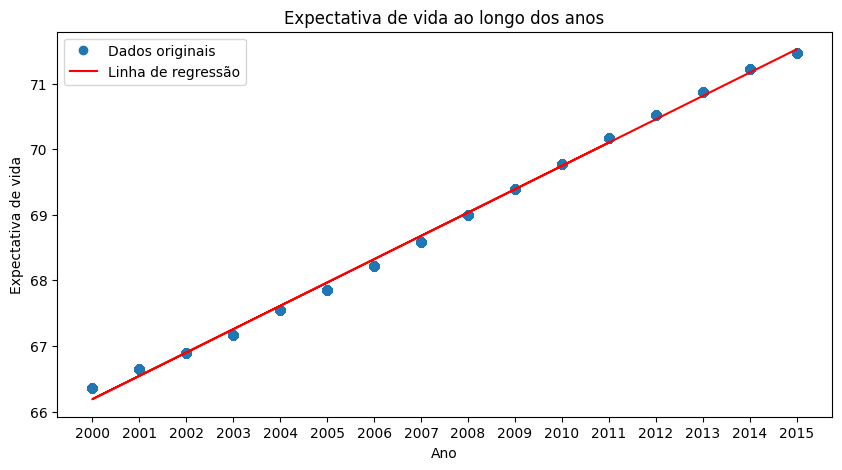

In [188]:
plt.figure(figsize=(10, 5))
plt.xticks(np.arange(2000, 2016, 1.0))
plt.title('Expectativa de vida ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Expectativa de vida')
plt.plot(df['year'], df['life_expectancy'], 'o', label='Dados originais')
plt.plot(df['year'], intercept + slope*df['year'], 'r', label='Linha de regressão')
plt.legend()
plt.show()

# Regressão Linear Múltipla

Nosso objetivo é prever a expectativa de vida do Brasil entre 2000 e 2015 com base em um modelo que leva em consideração todos os países do dataset (menos o Brasil). Para isso, utilizaremos a regressão linear múltipla. 

Antes de calcular a regressão múltipla, calcularemos a correlação entre cada atributo e a expectativa de vida. Assim, poderemos selecionar os atributos com maior correlação para fazer a regressão linear múltipla.

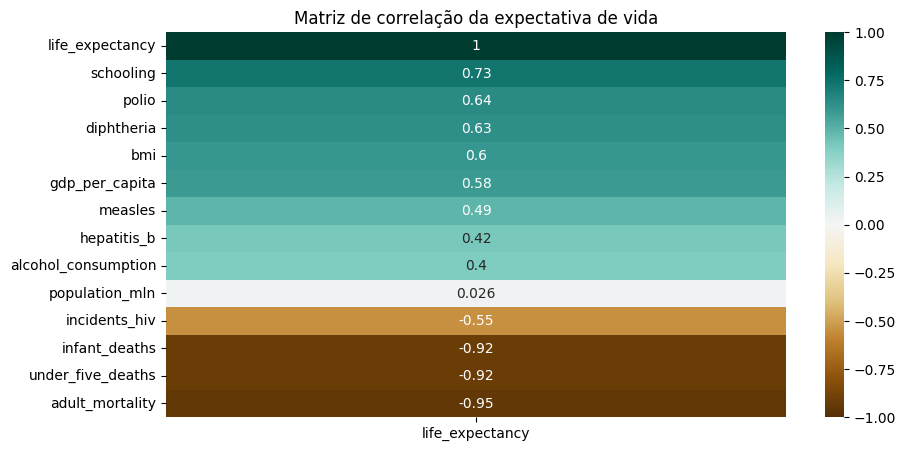

In [189]:
atributos = ['life_expectancy', 'infant_deaths', 'under_five_deaths', 'adult_mortality', 'alcohol_consumption', 'hepatitis_b', 'measles', 'bmi', 'polio', 'diphtheria', 'incidents_hiv', 'gdp_per_capita', 'population_mln', 'schooling']

# tirar media de cada atributo por ano e colocar em um novo dataset
df_reg = dataset.copy()

# calcula a matriz de correlacao
corr = df_reg[atributos].corr()

# plota a matriz de correlacao da expectativa de vida
plt.figure(figsize=(10, 5))
plt.title('Matriz de correlação da expectativa de vida')
sns.heatmap(corr[['life_expectancy']].sort_values(by='life_expectancy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()



Analisando as correlações, concluímos que o consumo de álcool e a população não estão correlaciondos com a expectativa de vida, então podemos retirar essas variáveis da análise.

Porém, antes de eliminar as variáveis e z-normalizar os dados, iremos separar os dados relativos ao Brasil, para futura comparação.

In [190]:
# retira os valores do brasil do dataset
df_brasil = df_reg[df_reg['country'] == 'Brazil']
df_reg = df_reg[df_reg['country'] != 'Brazil']

In [191]:
# drop de atributos pouco correlacionados ou que não fazem sentido para a regressão linear múltipla
df_reg = df_reg.drop(columns=['alcohol_consumption', 'country', 'region', 'year', 'developed', 'population_mln'])

In [192]:
# z-normalizar os dados valorados
df_reg = (df_reg - df_reg.mean()) / df_reg.std()
df_reg.head()

,infant_deaths,under_five_deaths,adult_mortality,hepatitis_b,measles,bmi,polio,diphtheria,incidents_hiv,gdp_per_capita,schooling,life_expectancy
0,-0.699961,-0.672783,-0.751641,0.797663,-0.663324,1.259558,0.699952,0.694027,-0.342575,-0.032677,0.051046,0.813151
1,-1.004283,-0.889944,-1.167600,0.797663,0.889722,0.441129,0.699952,0.694027,-0.338387,0.835163,0.648668,1.481451
2,0.763685,0.556306,0.075152,-1.512733,-2.269923,-1.741350,-1.287285,-1.427811,-0.321634,-0.617480,-0.829660,-0.364332
3,0.086205,-0.057119,0.258474,0.547890,-0.181344,0.122851,0.368746,0.436834,-0.045203,-0.436680,0.082500,-0.194604
4,-0.978923,-0.867556,-1.167179,0.797663,0.621955,0.895812,0.501229,0.501132,-0.342575,1.321203,1.623736,1.364764


Definimos aqui as funções que serão utilizadas para calcular a regressão linear múltipla, como a função que retorna a jacobiana e a função que calcula o gradiente.

In [193]:
# define a função que calcula a jacobiana
def jacobiana(theta, X, y):
    return -2 * ((y - X @ theta) * X.T).mean(axis=1)

# define a funcao de gradiente descendente
def gd(theta, X, y, lambda_=0.01, tol=0.00001, max_iter=10000):
    theta = theta.copy()
    old_err_sq = np.inf
    i = 0
    while True:
        # Computar as derivadas
        grad = jacobiana(theta, X, y)
        # Atualizar
        theta_novo = theta - lambda_ * grad
        
        # Parar quando o erro convergir
        err_sq = ((X.dot(theta) - y) ** 2).mean()
        if np.abs(old_err_sq - err_sq) <= tol:
            break
        theta = theta_novo
        old_err_sq = err_sq
        i += 1
        if i == max_iter:
            break
    return theta


# define a funcao de regressao linear multipla
def regressao_linear_multipla(X, y):
    theta = np.ones(X.shape[1])

    return gd(theta, X, y)


# printa os resultados da regressao linear multipla
y = df_reg['life_expectancy'].values
X = df_reg.drop(columns=['life_expectancy']).values
 
# adiciona o intercepto 1 ao X
X = np.c_[np.ones(X.shape[0]), X]

theta = regressao_linear_multipla(X, y)
print('Theta calculado pela nossa regressão linear múltipla: ', theta)

# analisar se os resultados batem com o scikit learn
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression()
model.coef_

Theta calculado pela nossa regressão linear múltipla:  [ 2.37512870e-07 -1.35583921e-01 -2.19469256e-01 -5.55432861e-01
 -3.31891620e-02  1.98668545e-03 -1.95205253e-02  3.05490261e-02
  1.89717668e-02 -1.00117576e-02  6.77678345e-02  9.39862178e-02]


array([ 0.        , -0.20600178, -0.20219306, -0.58152905, -0.01885747,
        0.00616915, -0.03555549, -0.0047429 ,  0.01162896,  0.01900572,
        0.06157982,  0.06672359])

O Gradiente Descendente aplicado com o método _gd_ que aprendemos em sala se aproxima do resultado obtido com o scikit learn.

Vamos calcular o R² para avaliar o modelo.

In [194]:
# calcula o R² a partir do y real e do y previsto
y_pred = X @ theta
r2 = 1 - ((y - y_pred)**2).sum() / ((y - y.mean())**2).sum()
print('R²: ', r2)

# R² do scikit learn
print('R² do scikit learn: ', model.score(X, y))

R²:  0.9767461420749297
R² do scikit learn:  0.9779383738304989


O R² de 0.97 indica que o modelo se ajustou bem aos dados.

## Prever a expectativa de vida do Brasil com o modelo

Utilizaremos o modelo para prever a expectativa de vida do Brasil, entre 2000 e 2015, de acordo com os atributos considerados anteriormente.

In [195]:
# a partir dos dados do brasil, prever a expectativa de vida com a regressao linear multipla calculada
df_brasil = df_brasil.drop(columns=['alcohol_consumption', 'country', 'region', 'year', 'developed', 'population_mln'])
dataset2 = dataset.drop(columns=['alcohol_consumption', 'country', 'region', 'year', 'developed', 'population_mln'])

exp_vida_brasil_real = df_brasil['life_expectancy'].values

# z-normalizar o df_brasil com base no dataset2
df_brasil = (df_brasil - dataset2.mean()) / dataset2.std(numeric_only=True)
y_brasil = df_brasil['life_expectancy'].values
X_brasil = df_brasil.drop(columns=['life_expectancy']).values

In [196]:
# adiciona o intercepto 1 ao X
X_brasil = np.c_[np.ones(X_brasil.shape[0]), X_brasil]

# calcula a expectativa de vida prevista para o Brasil com os pesos calculados pela regressao linear multipla
expectativa_vida_prevista = X_brasil @ theta

# voltando a expectativa de vida prevista para a escala original
expectativa_vida_prevista = expectativa_vida_prevista * dataset['life_expectancy'].std() + dataset['life_expectancy'].mean()
y_brasil = y_brasil * dataset['life_expectancy'].std() + dataset['life_expectancy'].mean()

print('Expectativa de vida prevista para o Brasil: ', expectativa_vida_prevista)
print('\nExpectativa de vida real para o Brasil: ', exp_vida_brasil_real)

# calcula a diferenca entre a expectativa de vida prevista e a real
diferenca = expectativa_vida_prevista - y_brasil
print('\nDiferenca entre a expectativa de vida prevista e a real: ', diferenca)

print('\nMédia da diferença: ', diferenca.mean())

Expectativa de vida prevista para o Brasil:  [72.44773074 72.93061974 71.31849742 72.71726562 70.15408117 71.65697418
 69.89574956 72.09481855 69.49269316 70.74721152 68.99884756 70.47652892
 72.27542349 72.63154268 71.81307239 71.02688932]

Expectativa de vida real para o Brasil:  [74.2 75.  72.6 74.7 71.2 73.  70.8 73.6 70.5 71.9 70.1 71.5 73.9 74.5
 73.3 72.3]

Diferenca entre a expectativa de vida prevista e a real:  [-1.75226926 -2.06938026 -1.28150258 -1.98273438 -1.04591883 -1.34302582
 -0.90425044 -1.50518145 -1.00730684 -1.15278848 -1.10115244 -1.02347108
 -1.62457651 -1.86845732 -1.48692761 -1.27311068]

Média da diferença:  -1.4013783747939614


A diferença entre a expectativa de vida prevista e a real é de aproximadamente -1 ano e meio, o que é um erro considerável, mas não tão grande, considerando que estamos prevendo a expectativa de vida de um país inteiro, com base em dados de outros países, sendo que muitos desses têm expecativas de vida menores que a do Brasil.

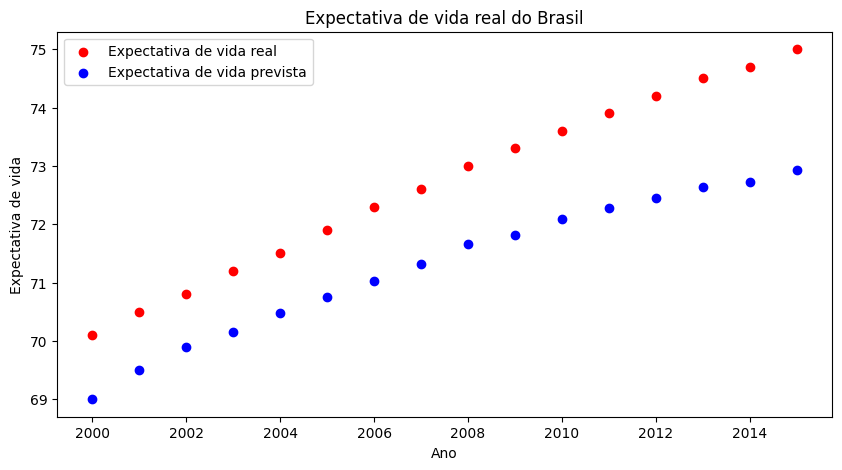

In [197]:
#plota a expectativa de vida real do brasil do dataset original
plt.figure(figsize=(10, 5))
#pontos reais
plt.scatter(dataset[dataset['country'] == 'Brazil']['year'], dataset[dataset['country'] == 'Brazil']['life_expectancy'], color='r', label='Expectativa de vida real')

#pontos previstos
plt.scatter(dataset[dataset['country'] == 'Brazil']['year'], expectativa_vida_prevista, color='b', label='Expectativa de vida prevista')
plt.title('Expectativa de vida real do Brasil')
plt.xlabel('Ano')
plt.ylabel('Expectativa de vida')
plt.legend()
plt.show()

## Avaliando os atributos do modelo

Agora avaliaremos a importância de cada atributo para o nosso modelo. Isso será feito por meio do método de _bootstrap_.

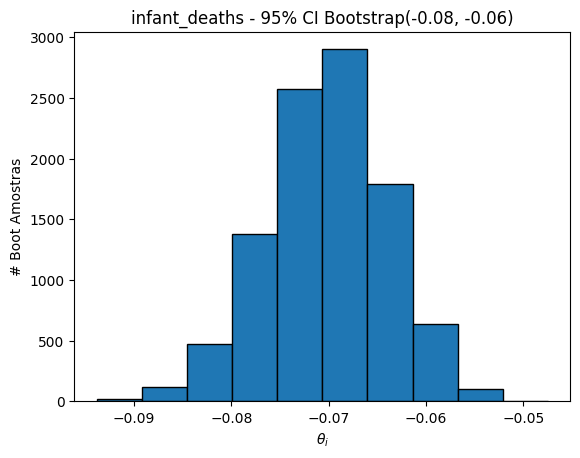

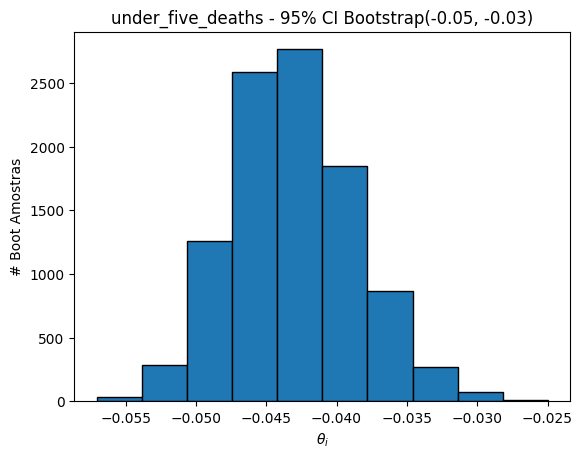

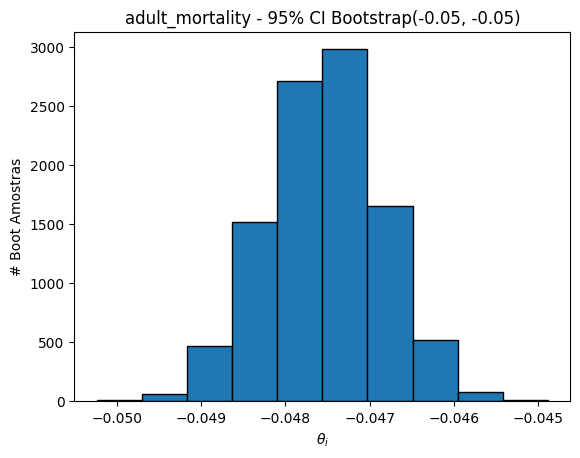

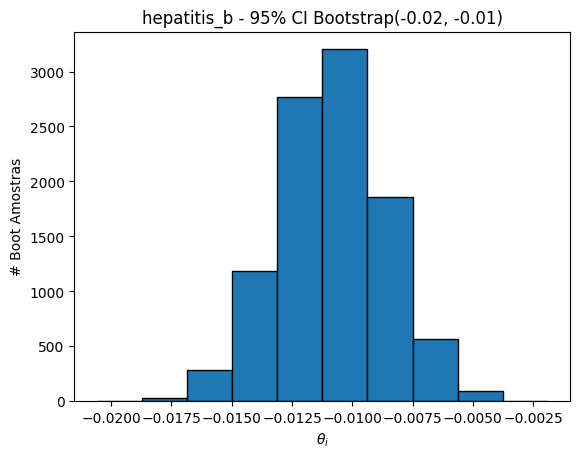

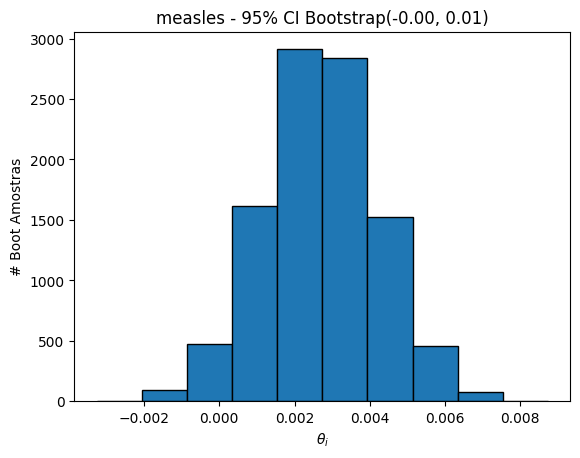

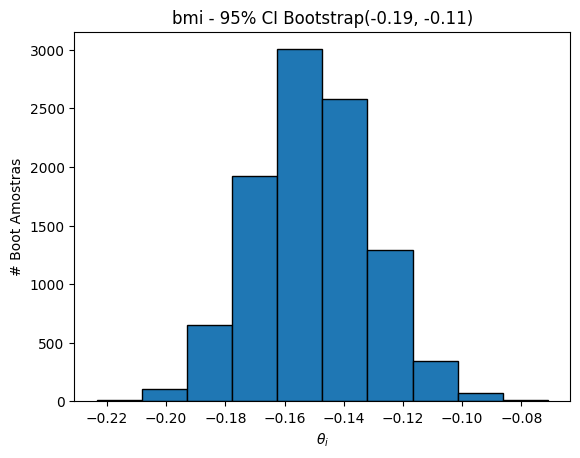

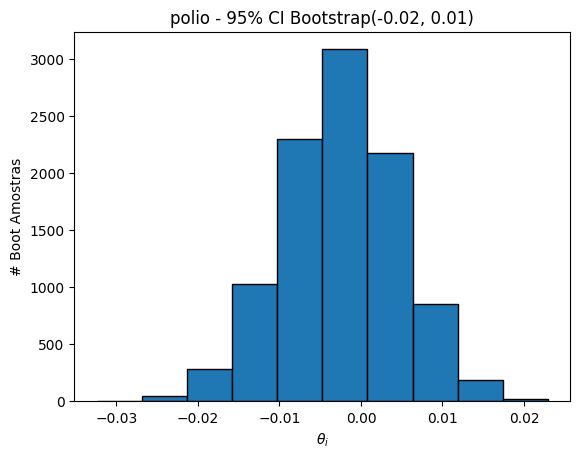

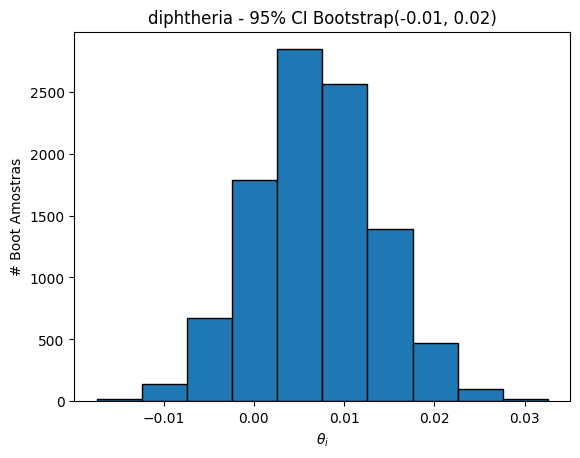

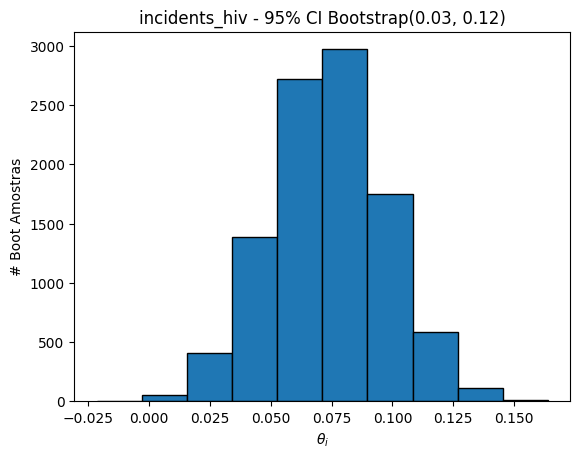

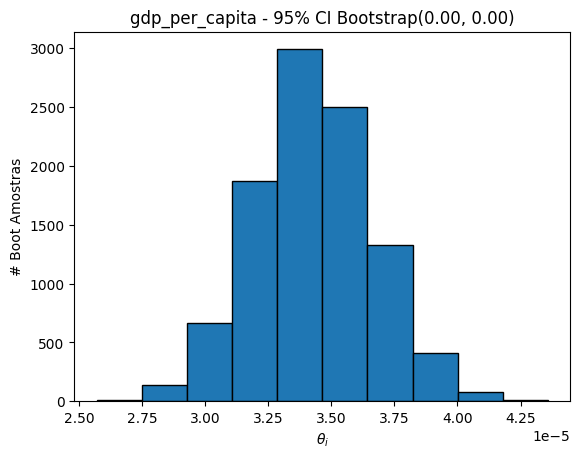

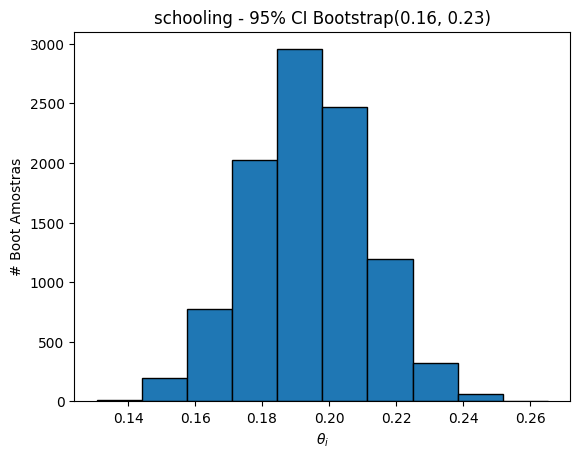

In [198]:
def bootstrap_regression(X, y, n=10000, size=None):
    if size is None:
        size = len(df)
        
    T = np.zeros(shape=(n, X.shape[1]))
    for i in range(n):
        # Gera amostras com reposição
        idx = np.random.choice(len(y), len(y))
        Xb = X[idx]
        yb = y[idx]
        
        # Fit usando sklearn
        model = LinearRegression(fit_intercept=True)
        model.fit(Xb, yb)
        
        T[i] = model.coef_
    return T


y = dataset['life_expectancy'].values
attributes = ['infant_deaths', 'under_five_deaths', 'adult_mortality', 'hepatitis_b', 'measles', 'bmi', 'polio', 'diphtheria', 'incidents_hiv', 'gdp_per_capita', 'schooling']
X = dataset[attributes].values
T = bootstrap_regression(X, y)

for col in range(X.shape[1]):
    plt.hist(T[:, col], edgecolor='k')
    plt.title('{} - 95% CI Bootstrap({:.2f}, {:.2f})'.format(attributes[col],
                                                             np.percentile(T[:, col], 2.5),
                                                             np.percentile(T[:, col], 97.5)))
    plt.xlabel(r'$\theta_i$')
    plt.ylabel('# Boot Amostras')
    plt.show()

Concluímos que alguns atributos apresentam o valor zero no Intervalo de Confiança, logo, não são relevantes para o modelo. São eles: measles, polio, diphteria e incidents_hiv.